In [7]:
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

ds = pd.read_csv('../../csv/ToDoVer1.csv', encoding = 'utf-8')
x = ds.iloc[:, [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]].values
print(x)

[[0 1 0 ... 1 3 0]
 [0 1 0 ... 1 4 0]
 [2 1 0 ... 1 0 4]
 ...
 [2 2 0 ... 1 2 0]
 [2 2 0 ... 1 2 0]
 [2 2 0 ... 1 2 0]]


In [8]:
pca = decomposition.PCA(n_components=2)    # 주성분 2개로 설정
pc = pca.fit_transform(x)    
pc

pc_df = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])
pc_df

,PC1,PC2
0,-2.492838,-0.722537
1,-2.870226,-1.661189
2,2.633066,1.593503
3,2.820803,2.081013
4,2.633066,1.593503
...,...,...
285,-1.631102,0.234407
286,-1.631102,0.234407
287,-1.211119,0.270641
288,-1.211119,0.270641


In [11]:
#n_clusters : k값, init : 초기 중심 설정 방식. 일반적으로 'k-means++'이 디폴트 , max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0, n_init=10) 
kmeans.fit(pc_df)

#각 데이터가 0,1,2,3라는 세 가지 군집으로 분류된 것을 확인.
print(kmeans.labels_)

pc_df['Cluster'] = kmeans.labels_

print(pc_df)

[0 0 1 1 1 1 2 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 0 3 2 2 3 2 0 0 2 2 1 2 1 2
 2 2 2 2 2 2 1 1 1 1 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 3 1 1 1 1 3 3 0 3 3 3 3
 3 3 1 1 1 1 1 1 1 1 3 0 3 3 0 0 0 2 2 2 2 1 1 2 2 2 2 0 3 2 1 3 0 2 2 0 2
 2 0 0 3 3 0 0 0 3 3 0 0 0 1 1 1 1 1 1 1 3 3 3 3 3 3 3 0 0 2 0 0 0 0 0 0 2
 2 0 0 3 3 3 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 3 3 0 2 1 2 2 2 0 2 2 2 2 2 2 2 3 2
 2 2 2 0 2 2 2 3 0 2 2 2 2 0 0 0 0 0 2 2 0 0 0 2 2 2 0 0 2 2 2]
          PC1       PC2  Cluster
0   -2.492838 -0.722537        0
1   -2.870226 -1.661189        0
2    2.633066  1.593503        1
3    2.820803  2.081013        1
4    2.633066  1.593503        1
..        ...       ...      ...
285 -1.631102  0.234407        0
286 -1.631102  0.234407        0
287 -1.211119  0.270641        2
288 -1.211119  0.270641        2
289 -1.211119  0.270641        2

[290 rows x 3 

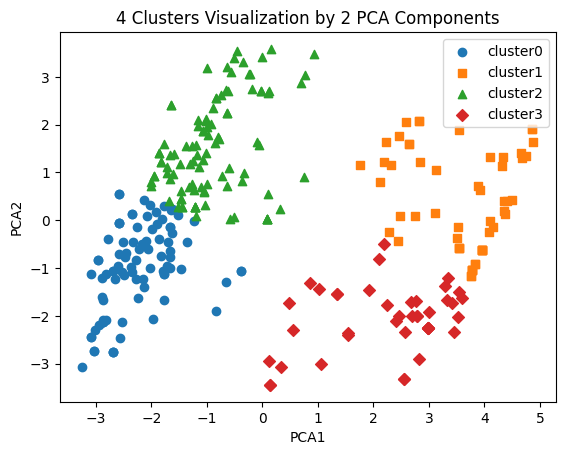

In [12]:
marker0 = pc_df[pc_df['Cluster'] == 0].index
marker1 = pc_df[pc_df['Cluster'] == 1].index
marker2 = pc_df[pc_df['Cluster'] == 2].index
marker3 = pc_df[pc_df['Cluster'] == 3].index
# marker4 = pc_df[pc_df['Cluster'] == 4].index
# marker5 = pc_df[pc_df['Cluster'] == 5].index

 #scatter plot
plt.scatter(x = pc_df.loc[marker0, 'PC1'], y = pc_df.loc[marker0, 'PC2'], marker = 'o')
plt.scatter(x = pc_df.loc[marker1, 'PC1'], y = pc_df.loc[marker1, 'PC2'], marker = 's')
plt.scatter(x = pc_df.loc[marker2, 'PC1'], y = pc_df.loc[marker2, 'PC2'], marker = '^')
plt.scatter(x = pc_df.loc[marker3, 'PC1'], y = pc_df.loc[marker3, 'PC2'], marker = 'D')
# plt.scatter(x = pc_df.loc[marker4, 'PC1'], y = pc_df.loc[marker4, 'PC2'], marker = '+')
# plt.scatter(x = pc_df.loc[marker5, 'PC1'], y = pc_df.loc[marker5, 'PC2'], marker = 'x')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('4 Clusters Visualization by 2 PCA Components')
# plt.legend(['cluster0', 'cluster1', 'cluster2'])
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3'])
# plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4'])
# plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5'])
plt.show()